# Notebook 5 - NumPy
[NumPy](http://numpy.org) short for Numerical Python, has long been a cornerstone of numerical computing on Python. It provides the data structures, algorithms and the glue needed for most scientific applications involving numerical data in Python. All computation is done in vectorised form - using vectors of several values at once instead of singular values at a time. NumPy contains, among other things:
* A fast and efficient multidimensional array object `ndarray`.
* Mathematical functions for performing element-wise computations with arrays or mathematical operations between arrays.
* Tools for reading and manipulating large array data to disk and working with memory-mapped files.
* Linear algebra, random number generation and Fourier transform capabilities.

For the rest of the course, whenever array is mentioned it refers to the NumPy ndarray.
<br>

## Table of contents
- [The ndarray](#ndarray)
    - [Creating arrays](#creating)
    - [Data Types](#data)
    - [Arithmetic Operations](#arithmetic)
    - [Indexing and Slicing](#indexing)
- [Functions with ndarrays](#functions)
    - [Universal Functions](#universal)
    - [Whole-Array Functions](#whole)
    - [Linear algebra](#linear)
- [File I/O](#file)

# Why NumPy?
Is the first question that anybody asks when they find out about it. 

Some people might say: *I don't care about speed, I want to spend my time researching algotirhm, not optimise computer code!*

That's perfectly reasonable, but are you willing to wait a lot longer for your experiment to finish? I definitely don't want to do that. Let's see how much faster NumPy really is!

To show that we'll be using the magic command `%timeit` which you can read more about [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html) and don't worry about the details now, they will clear up later.

Let's have a look at generating a vector of 10M random values and then summing them all up using the Python way and using the NumPy way!

In [1]:
import numpy as np 

x = np.random.rand(10000000)      # generate random numbers

print("Running normal python sum()")
%timeit sum(x)

print("Running numpy sum()")
%timeit np.sum(x)

Running normal python sum()
1.32 s ± 78.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Running numpy sum()
13.1 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**WOW** that was a difference of roughly a **100 times** and that was just for a single summing operation. Imagine if you had several of those running all the time!

Are you onboard with Numpy then? Let's proceed...

# The ndarray <a name="ndarray"></a>
The ndarray is a backbone on Numpy. It's a fast and flexible container for N-dimensional array objects, usually used for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

Here is a quick example of its capabilities:

In [2]:
# create a 2x3 array of random values
data = np.random.rand(2,3)
data

array([[0.06600371, 0.66313377, 0.66037131],
       [0.56405153, 0.68810896, 0.23584809]])

In [3]:
data * 10   # multiply all numbers by 10

array([[0.6600371 , 6.63133768, 6.60371305],
       [5.64051526, 6.88108961, 2.35848088]])

In [4]:
data + data # element-wise addition

array([[0.13200742, 1.32626754, 1.32074261],
       [1.12810305, 1.37621792, 0.47169618]])

Every array has a shape, a tuple indicating the size of each dimnesion and a dtype. You can obtain these via the respective methods:

In [5]:
# number of dimensions of the array
data.ndim

2

In [6]:
# the size of the array
data.shape

(2, 3)

In [7]:
# the type of values store in the array
data.dtype

dtype('float64')

## Creating arrays <a name="creating"></a>
The easiest and quickest way to create an array is from a normal Python list.

In [8]:
data = [1.2, 5.2, 5, 7.8, 0.3]
arr = np.array(data)

arr

array([1.2, 5.2, 5. , 7.8, 0.3])

It is also possible to create multidimensional arrays in a similar fashion. An example would be:
```python
data = [[1.2, 5.2, 5, 7.8, 0.3],
        [4.1, 7.2, 4.8, 0.1, 7.7]]
```
Try creating a multidimensional array below and verify its number of dimensions:

In [9]:
data = [[1.2, 5.2, 5, 7.8, 0.3],
        [4.1, 7.2, 4.8, 0.1, 7.7]]
arr = np.array(data)
print(arr.shape)
arr

(2, 5)


array([[1.2, 5.2, 5. , 7.8, 0.3],
       [4.1, 7.2, 4.8, 0.1, 7.7]])

We can also create an array filled with zeros

In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Again, it is also possible to create a multidimensional array by passing a tuple as an argument

In [11]:
np.zeros((4,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

NumPy also has an equivalent to the built-in Python function `range()` but it's called `arange()`

In [12]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here is a summary of the most often used methods to create arrays. Use it as a future reference!

| Function | Description |
|----|:--|
| array  | Convert input data to an ndarray either by inferring a dtype<br>or explicitly specifying a dtype; copies the input data by default. |
| arange | Similar to the built-in `range` function but returns an ndarray. |
| linspace | Return evenly spaced numbers over a specified interval. |
| ones | Produces an array of all 1s with the given shape and dtype. |
| ones_like | Similar to `ones` but takes another array and produces a ones array<br>of the same shape and dtype |
| zeros, zeros_like | Similar to `ones` but produces an array of 0s. |
| eye | Create a square NxN identity matrix (1s on the diagonal and 0s elsewhere). |

## Data Types <a name="data"></a>
The data type or `dtype` is a special object containing the information the array needs to interpret a chunk of memory. We can specify it during the creation of an array.

In [13]:
arr = np.array([1, 2, 3], dtype=np.float64)

In [ ]:
# you can check the type of an array with
arr.dtype

An ndarray can only hold data in **one** dtype. This makes it a little less flexible than a regular Python list, but is part of what allows NumPy to run so fast. 

NumPy has several types of data like int, float and bool. However, it also extends these by specifying the number of bits used per variable like 16, 32, 64 or 128.

To keep things simpe, you can use:
- `np.int64` to store integer numbers
- `np.float64` to store numbers with a fraction value
- `np.bool` to store `True` and `False` values

When creating arrays in NumPy the type is inferred (guessed) so you don't need to explicitly specify it.

It is not necessary for this course but if you want to learn more about datatypes in NumPy you can go to https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

Similar to normal Python, you can cast (convert) an array from one dtype to another using the `astype` method:

In [ ]:
arr = np.array([1, 2, 3])
arr.dtype

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

We can try creating a `float64` array and then converting it to an `int64` array below:

In [ ]:
arr = np.array([1,2,3],dtype=np.float64)
int_arr = arr.astype(np.int64)
int_arr.dtype

## Exercise 1


- Create a 5x5 [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix).
- Convert it to `int64` dtype.
- Confirm its properties such as dimensionality, shape and data type.

In [ ]:
arr = np.eye(5)
print(arr.dtype)

int_arr = arr.astype(np.int64)
print(int_arr.dtype)

print('Dimensionality:{}, shape:{} and data type:{}.'.format(int_arr.ndim,int_arr.shape,int_arr.dtype))

## Arithmetic operations <a name="arithmetic"></a>
You have already gotten a taste of this in the examples above but let's try to extend that.

Arrays are important because they enable you to express batch operations on data without having to write for loops - this is called **vectorization**.

Any arithmetic operation between equal-size arrays applies the operation element-wise:

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [16]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Arithmetic operations with scalars propogate the scalar argument to each element in the array:

In [17]:
A * 5

array([[ 5, 10, 15],
       [20, 25, 30]])

In [18]:
A ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [19]:
B = np.array([[1, 7, 4],[4, 12, 2]])
B

array([[ 1,  7,  4],
       [ 4, 12,  2]])

In [20]:
A >= B

array([[ True, False, False],
       [ True, False,  True]])

## Exercise 2
Generate a vector of size 10 with values ranging from 0 to 0.9, both included.

In [21]:
arr = np.arange(10) /10
print(arr)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


## Broadcasting

Applying arithmetic operations to differently sized arrays is called **broadcasting**.

Let's see an example

In [22]:
A = np.ones((3,3))
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [23]:
B = np.arange(3)
B

array([0, 1, 2])

In [24]:
A + B

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

So what happened?

We stretched both `B` to match the shape of `A`, the result is a two-dimensional array!

<img src="img/broadcasting.png" alt="drawing" width="500"/>

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

If you want to learn more about broadcasting, check [this article](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).

## Exercise 3
Change the value of `c` so that the following code runs properly.

_Hint: What happens when you obtain `a*b`? What are the dimensions of this object? Use .shape, and comment out some lines, to play with this code and figure this out._

In [28]:
a = np.asarray([[3], [7], [878], [26]])
b = np.asarray([1, 10, 11, 101, 110])
c = np.asarray([0, 1, 2, 3, 4]) # Change this variable to have size 5 , 6 does not work

(a*b) +c

array([[    3,    31,    35,   306,   334],
       [    7,    71,    79,   710,   774],
       [  878,  8781,  9660, 88681, 96584],
       [   26,   261,   288,  2629,  2864]])

## Indexing and slicing <a name="indexing"></a>
NumPy offers many options for indexing and slicing. Coincidentally, they are very similar to Python.

Let's see how this is done in 1D:

In [29]:
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
A[5]

5

In [31]:
A[5:8]

array([5, 6, 7])

In [32]:
A[5:8] = 0
A

array([0, 1, 2, 3, 4, 0, 0, 0, 8, 9])

**Important:** Unlike regular Python, NumPy array slices are _views_ on the original array. This means that the data is not copied, and any modifications to the source array will be reflected in the view. Similarly, changing the slice will update the original array.

In [33]:
A_slice = A[5:8]   # Take a slice
A_slice

array([0, 0, 0])

In [34]:
A[5:8] = [5, 6, 7] # Update source array
A_slice            # Slice is changed 

array([5, 6, 7])

In [35]:
A_slice[:] = 0     # Edit the slice
A                  # The array is changed

array([0, 1, 2, 3, 4, 0, 0, 0, 8, 9])

Let's now have a look at higher dimensional arrays:

In [36]:
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Now that we have 2 dimensions, we need to input 2 indices to get a specific element of the array. Alternatively, if we input only one index, then we obtain the whole row of the array:

In [37]:
C[2][1]

8

In [38]:
C[2, 1]

8

In [39]:
C[2]

array([7, 8, 9])

Here is a picture to better explain indexing in 2D:
<img src="img/ndarray.png" alt="drawing" width="300"/>

The same concepts and techniques are extended into multidimensional arrays:
if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all data along the higher dimensions.

Now let's look into **slicing**. You already saw above that slicing in 1D is done the same way as in standard Python data structures. So how do we do that in 2D? Well, it is fairly intuitive:

In [40]:
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [41]:
C[:2]

array([[1, 2, 3],
       [4, 5, 6]])

This can be read as *select the first 2 rows of C*

In [42]:
C[1, :2]     # Select row 1, the first 2 columns.

array([4, 5])

In [43]:
C[:, :1]     # Select all rows, first 1 column (i.e. select column 1)

array([[1],
       [4],
       [7]])

Here is some visual aid for what happened above:
<img src="img/indexing.png" alt="drawing" width="400"/>

## Exercise 4
Create a 4 by 4 2D array with 1s on the border and 0s inside

In [44]:
arr = np.ones((4,4))
arr[1:-1,1:-1] = 0     # same as doing arr[1:3,1:3] = 0 
arr

array([[1., 1., 1., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 1., 1.]])

## Reshaping and Transposing Arrays <a name="transposing"></a>
We can use the method `reshape()` to convert the data from one shape into another, and we can use the `T` attribute to obtain the transpose of the array.

In [45]:
A = np.arange(15)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [46]:
B = A.reshape((3,5))
B

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [47]:
B.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

# Functions with ndarrays <a name="functions"></a>
Now that we've seen how to create and manipulate ndarrays, we will see some of the many functions NumPy has to compute with them. In particular, we'll look at: functions which work element-wise (called ufuncs), functions which work on the whole array at once, and functions specialised for linear algebra.

## Universal Functions <a name="universal"></a>
or *ufunc* are functions that perform element-wise operations on data in ndarrays. You can think of them as fast vectorised wrappers for simple functions. Here is an example of `sqrt` and `exp`:

In [48]:
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
np.sqrt(A)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [50]:
np.exp(A)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Other universal functions take 2 arrays as input. These are called *binary* functions.

For example `maximum()` selects the biggest values from two input arrays

In [51]:
x = np.random.randn(10)
y = np.random.randn(10)
np.maximum(x, y)

array([ 0.85023002, -0.13470438,  0.71843943,  1.28429862,  0.8896106 ,
        0.8608694 ,  0.10314774, -0.15972058,  1.47843712,  0.17751599])

Here is a list of useful *ufuncs* in NumyPy:

*Again, you don't need to memorise them. This is just a reference*
### Unary functions (accept one argument)

| Function | Description |
|----|----|
| abs, fabs | Compute the absolute value element-wise for integer, floating point, or complex values.<br>Use fabs as a faster alternative for non-complex-valued data |
| sqrt | Compute the square root of each element. Equivalent to arr ** 0.5 |
| exp | Compute the exponent ex of each element |
| log, log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively |
| cos, cosh, sin, sinh, tan, tanh | Regular and hyperbolic trigonometric functions |

### Binary functions (accept 2 arguments)
| Functions | Description |
| ---- | ---- |
| add | Add corresponding elements in arrays |
| subtract | Subtract elements in second array from first array |
| multiply | Multiply array elements |
| divide, floor_divide | Divide or floor divide (truncating the remainder) |
| mod | Element-wise modulus (remainder of division) |
| power | Raise elements in first array to powers indicated in second array |
| maximum | Element-wise maximum. fmax ignores NaN |
| minimum | Element-wise minimum. fmin ignores NaN |

## Whole-Array Functions <a name="whole"></a>
As well as ufuncs, which operate element-by-element, there are many functions which work on the whole of an array at once.

NumPy offers a set of mathematical functions that compute statistics about an entire array:

In [52]:
B = np.random.randn(5, 4)
B

array([[-3.48945971e-01,  8.69566411e-02,  3.26310770e-01,
         8.45016176e-04],
       [-1.13142366e+00,  3.81793468e-01, -4.23045572e-01,
        -8.90505898e-01],
       [-3.06433685e-01,  2.24110750e-01,  1.42452157e+00,
         1.94829269e-01],
       [-7.30350560e-01, -4.16161990e-01,  3.92740836e-01,
        -4.11931028e-03],
       [ 1.17596251e+00, -1.02164643e+00, -2.77135847e-01,
         5.59078876e-01]])

In [53]:
B.mean()

-0.039130960447649195

In [54]:
np.mean(B)

-0.039130960447649195

In [55]:
B.sum()

-0.7826192089529839

In [56]:
B.mean(axis=1) # Compute mean in column (axis 1) direction (i.e. the mean of each row)

array([ 0.01629161, -0.51579541,  0.38425698, -0.18947276,  0.10906478])

Here `mean(axis=1)` means compute the mean across the columns (axis 1). This will compute the mean in the direction where the column index grows, i.e. the mean **of each row**. Similarly, choosing `axis=0` would compute the mean in the row direction, so we would obtain the mean of each column.

Here is a set of other similar functions:

| Function | Description|
| --- | --- |
|sum | Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0. |
| mean | Arithmetic mean. Zero-length arrays have NaN mean. |
| std, var | Standard deviation and variance, respectively, with optional<br>degrees of freedom adjustment (default denominator n). |
|min, max | Minimum and maximum. |
| argmin, argmax | Indices of minimum and maximum elements, respectively. |

Similar to Python's built-in list type, NumyPy arrays have a function to sort them in-place:

In [57]:
A = np.random.randn(10)
A

array([ 0.51692212, -1.02947797,  1.74087838, -0.74177412,  0.48901911,
        0.09769372, -1.44644377, -1.51833652,  1.35100669,  0.59423292])

In [58]:
A.sort()
A

array([-1.51833652, -1.44644377, -1.02947797, -0.74177412,  0.09769372,
        0.48901911,  0.51692212,  0.59423292,  1.35100669,  1.74087838])

Another option is `unique()` which returns the sorted unique values in an array.

## Exercise 5
Create a random vector of size 30 and find its mean value

In [59]:
(np.random.randn(30)).mean()

0.1713250858913182

## Exercise 6

Subtract the mean of each column of a randomly generated matrix:

In [60]:
C = np.random.randn(5,4)
C_col_mean = C.mean(axis=0)
C_new = C - C_col_mean
print('Original matrix is {},\n column mean vector is {},\n the new matrix is {}.'
      .format(C,C_col_mean,C_new))

Original matrix is [[-0.35455266  0.67473305  0.95088891 -0.8946966 ]
 [-0.7000518   0.5186015  -0.52536211 -0.25892279]
 [ 0.10969886 -0.84342201 -0.21543048 -0.01779249]
 [ 0.26332872  0.2934548   0.73791156  0.82150045]
 [-0.28131294  1.67119548  1.24276795 -0.14144768]],
 column mean vector is [-0.19257797  0.46291256  0.43815517 -0.09827182],
 the new matrix is [[-0.1619747   0.21182049  0.51273374 -0.79642478]
 [-0.50747384  0.05568894 -0.96351728 -0.16065097]
 [ 0.30227683 -1.30633458 -0.65358565  0.08047933]
 [ 0.45590668 -0.16945776  0.29975639  0.91977228]
 [-0.08873498  1.20828291  0.80461279 -0.04317586]].


## Linear Algebra <a name="linear"></a>
NumyPy offers a set of standard linear algebra operations, like matrix multiplication, decompositions and determinants. Let's start with the basics. In numpy, matrix multiplication is done with `@`: 

In [61]:
A = np.random.randn(3,1)
A

array([[ 0.32055589],
       [ 0.66838434],
       [-0.52195589]])

In [62]:
B = np.random.randn(1,3)
B

array([[-1.64355353, -1.06494567,  0.08925509]])

In [63]:
A @ B

array([[-0.52685076, -0.3413746 ,  0.02861124],
       [-1.09852544, -0.71179301,  0.0596567 ],
       [ 0.85786244,  0.55585466, -0.04658722]])

There are a few functions available in standard NumPy for working with matrices:

| Function | Description |
| --- | --- |
| diag | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array,<br>or convert a 1D array into a square matrix with zeros on the off-diagonal |
| dot | Matrix multiplication |
| trace | Compute the sum of the diagonal elements |

We can also extend this with the `numpy.linalg` module, which provides linear algebra functionality:

In [64]:
A = np.random.randn(5, 5)
A

array([[-1.91791973, -1.16667853, -0.91738213, -1.40250779,  0.18442811],
       [-0.34092905, -1.23376693, -0.56282799, -0.75947495,  0.04093688],
       [ 1.56068251,  0.78313443, -1.48180345, -0.7368204 , -0.40775138],
       [-0.46332991, -0.9033763 ,  0.14366424,  0.64505514, -0.31236788],
       [ 1.79145757, -0.21049458, -0.31211378,  1.04684584,  0.64028623]])

In [65]:
from numpy.linalg import inv
inv(A)  # get the inverse of a matrix

array([[-0.56566065,  0.76508439,  0.03283481, -0.28495012, -0.00408765],
       [ 0.27922602, -0.84677333,  0.13699647, -0.18546447, -0.02952666],
       [-0.81974417,  0.94466076, -0.49368124, -0.56312657, -0.41339239],
       [ 0.43793802, -1.00190051,  0.10391149,  0.80083621,  0.39477994],
       [ 0.55885252, -0.32045106, -0.45737229, -0.84755038,  0.71656774]])

We needed the above import statement to get access to the `inv()` function, since it lives in the `linalg` submodule of NumPy and so wasn't imported when we imported NumPy. We could also call it directly by giving the submodule as follows:

In [66]:
np.linalg.inv(A)

array([[-0.56566065,  0.76508439,  0.03283481, -0.28495012, -0.00408765],
       [ 0.27922602, -0.84677333,  0.13699647, -0.18546447, -0.02952666],
       [-0.81974417,  0.94466076, -0.49368124, -0.56312657, -0.41339239],
       [ 0.43793802, -1.00190051,  0.10391149,  0.80083621,  0.39477994],
       [ 0.55885252, -0.32045106, -0.45737229, -0.84755038,  0.71656774]])

Here is a set of commonly used `numpy.linalg` functions

| Function | Description |
| --- | --- |
| det | Compute the matrix determinant |
| eig | Compute the eigenvalues and eigenvectors of a square matrix |
| inv | Compute the inverse of a square matrix |
| pinv | Compute the Moore-Penrose pseudo-inverse inverse of a square matrix |
| qr | Compute the QR decomposition |
| svd | Compute the singular value decomposition (SVD) |
| solve | Solve the linear system Ax = b for x, where A is a square matrix |
| lstsq | Compute the least-squares solution to y = Xb |

## Exercise 7
Obtain the diagonal of a dot product of 2 random matrices

In [ ]:
A = np.random.randn(5, 4)
B = np.random.randn(4, 5)
np.diag(A @ B)

# File I/O <a name="file"></a>
NumPy offers its own set of File Input/Output functions.

The most common one is `genfromtxt()` which can load the common `.csv` and `.tsv` files.

Now let us analyse temperature data from Stockholm over the years.

First we have to load the file:

In [72]:
data = np.genfromtxt("./Notebook-5.dat")
data.shape

(77431, 7)

The first column of this array gives years, and the 6th gives temperature readings. We can extract these.

In [75]:
yrs = data[:, 0]
temps = data[:, 5]
print(yrs)
print(temps)

[1800. 1800. 1800. ... 2011. 2011. 2011.]
[ -6.1 -15.4 -15.  ...   4.2  -0.1  -3.3]


### Having read in our data, we can now work with it - for example, we could produce a plot.
We will cover plotting in more depth in notebook 3, so there's no need to get too caught up in the details right now - this is just an examle of something we might do having read in some data. 

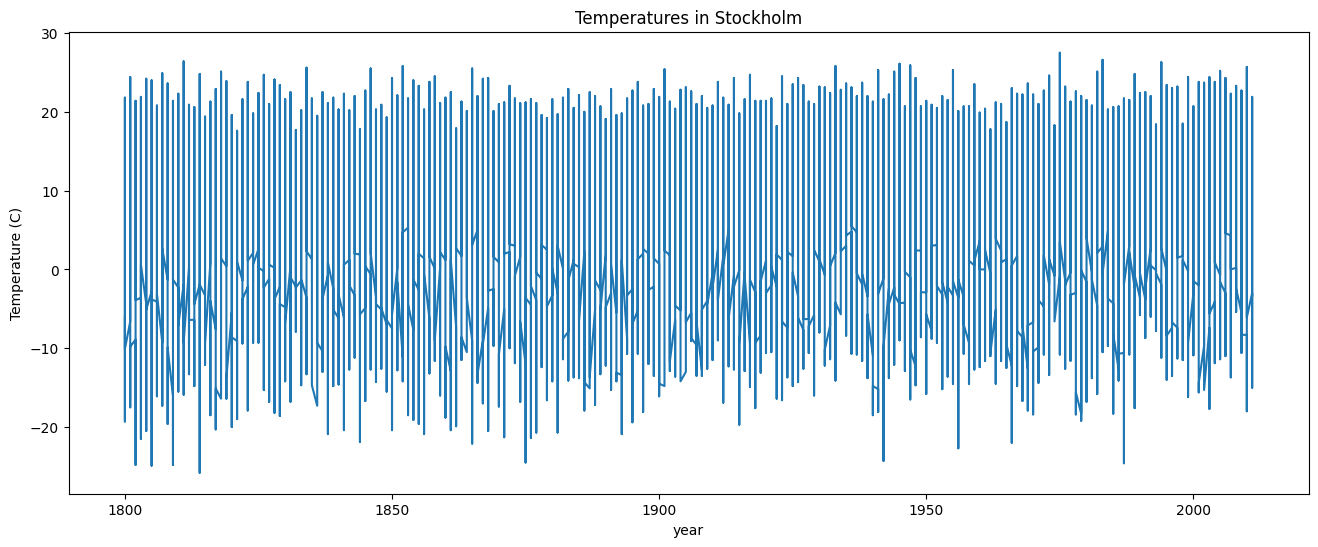

In [70]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(16, 6)) # Create a 16x6 figure
plt.plot(yrs, temps) # Plot temps vs yrs


#Set some labels
plt.title("Temperatures in Stockholm")
plt.xlabel("year")
plt.ylabel("Temperature (C)")

plt.show() # Show the plot